<img src= "https://fasest.univ-lille.fr/filefsest/Nouveaux_logos/ULille-Fasest-cobranding-web-RVB-V-2022.svg"
     align="left"
     width="250"/>  
<font color=purple> <h1 style='text-align:center;'> <span style="font-family:Times New Roman">Étude de cas statistiques </span> </h1> </font>     
<p style='text-align:right;'> <span style="font-family:Times New Roman">M2 Économétrie appliquée</span> </p>
<h2 style='text-align:center;'> <span style="font-family:Times New Roman">Sujet 1:Participation des femmes au marché du travail.</span> </h2>    

### Changement de la largeur des céllules

In [12]:
# Settings pour l'affichage du notebook
from IPython.display import display, HTML
display(HTML("<style>.container {width:95% !important; }</style>"))

### Modification de la taille des caractères

In [13]:
# Settings pour l'affichage du notebook
from IPython.display import display, HTML
display(HTML("<style type='text/css'>.CodeMirror{font-family: consolas; font-size: 14.4px;</style>"))

In [14]:
import ipywidgets as widgets
widgets.DatePicker(description='Date',disabled=False)

DatePicker(value=None, description='Date')

# Partie I. Description de la base de données 
 ## **<span style="font-family:Times New Roman"> <font color=green> Question 1:</font> La base de données "ParticipationFemmesMT" contient des informations sur 753 femmes américaines, dont certaines travaillent et d’autres pas (voir le dictionnaire des variables en Annexe). Créez un répertoire de travail dans votre logiciel de travail et ouvrez la base. </span>**

Avant de créer un  repertoir,il est nécessaire d'importer quelques librairies python.
## I.1.importation des librairies

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.model_selection import train_test_split

* Verifions la version de pandas

In [11]:
print(pd.__version__)

1.4.2


### I.2.Déterminer du répertoire de travail.

In [ ]:
#Connaître l'emplacement de base
os.getcwd()

In [ ]:
#Déterminer l'emplacement de travail
path="C:/Users/maham/Desktop/Cours M2 _EA _Semestre3_2022-2023/Etudes des cas sur python/"
os.chdir(path)
path

In [ ]:
# Connaître le contenu du répertoire
os.listdir(path)

### I.3.Importation de la base des données

In [ ]:
projet= pd.read_excel(path+"ParticipationFemmesMT_EXCEL_26092022.xls")
projet.head()

In [ ]:
#projet= pd.read_table(path+"glove.42B.300d.txt",nrows=5,sep="/")
#projet.head()

## <span style="font-family:Times New Roman">Question 2. Décrivez la base de données (nombre d’observations, variables, labels éventuels). </span>      

### II.1. Description de la base

In [ ]:
print(projet.info())
print(projet.shape)

<span style="font-family:Times New Roman">La base des données de format xlsx est constituée de 253 observations(nombres des lignes) et 17 variables(colonnes) dont trois sont de type décimale(Wage,huswage et unem) et le reste sont des entiers.Pour une definition de chaque variable,se rapporter à l'annexe.</span> 

In [1]:
# Nous voulons lister les colonnes dans 3 catégories.
def columns_categories(data_set):
    object_columns = []
    float_columns = []
    int_columns = []
    other_columns = []
    n,m,s=0,0,0
    for i in data_set.columns.values:
        if data_set[i].dtypes=='object':
            object_columns.append(i)
            n+=1
        if data_set[i].dtypes=='int64':
            int_columns.append(i)
            m+=1
        if data_set[i].dtypes=='float64':
            float_columns.append(i)
            s+=1
    print('object(',n,'):\n',object_columns)
    print('int(',m,'):\n',int_columns)
    print('float(',s,'):\n',float_columns)

In [ ]:
#Affichage des catégories des variables
columns_categories(projet)

**<font color=blue><span style="font-family:Times New Roman">Affichons les noms des colonnes de la base afin d'avoir une liste des  variables que nous pourrions eventuellement utiliser pour des automatisations.</span></font>** 

In [ ]:
projet.columns

- ### Affichage de nombres des modalités de chaque variable

In [ ]:
projet.nunique()

- ### Affichage de fréquence d’apparition des modalités des variables "inlf" et "city"

In [ ]:
#Aucune colonne objet
#obj_col = projet.select_dtypes(include = 'object').columns
#obj_col
print(projet['inlf'].value_counts())
print(projet['city'].value_counts())

### II.2.Quelques visualisations graphiques

* ### Statistiques bivariées

In [ ]:
# Box plot des variables 
numerical_features=['hours', 'kidslt6', 'kidsge6', 'age', 'educ', 'wage', 'hushrs',
       'husage', 'huseduc', 'huswage', 'faminc', 'motheduc', 'fatheduc',
       'unem', 'city', 'exper']
fig, ax = plt.subplots(4, 4, figsize = (14,9))
ax = ax.flatten()
for i, c in enumerate(numerical_features):
    sns.boxplot(x =projet['inlf'] , ax = ax[i],y=projet[c],palette = 'GnBu')
plt.suptitle('Statistiques bivariées ', fontsize = 18)
fig.tight_layout()
plt.savefig("mes_graphiques4.jpg")

In [ ]:
# Box plot des variables 
fig, ax = plt.subplots(4, 4, figsize = (13, 9))
ax = ax.flatten()
for i, c in enumerate(numerical_features):
    sns.boxplot(x =projet['inlf'] , ax = ax[i],y=projet[c],palette ='seismic',hue =projet['city'])
plt.suptitle('Graphique2:Statistiques bivariées en fonction de la zone', fontsize = 18)
fig.tight_layout()
plt.savefig("mes_graphiques5.jpg")

In [ ]:
# Box plot des variables 
fig, ax = plt.subplots(4, 4, figsize = (20, 15))
ax = ax.flatten()
for i, c in enumerate(numerical_features):
    sns.boxplot(x =projet['inlf'] , ax = ax[i],y=projet[c],palette ='Spectral',hue =projet['kidslt6'])
plt.suptitle('Statistiques bivariées en fonction des enfants de moins de 6 ans', fontsize = 24)
fig.tight_layout()
plt.savefig("mes_graphiques6.jpg")

In [ ]:
# on crée le box plot
sns.boxplot("inlf","faminc", data=projet, linewidth=1, fliersize=2)
plt.title("Box plot du revenu familiale horaire catégorie des femmes")

In [ ]:
plt.figure(figsize=(5,4))
sns.boxplot("inlf","age", data=projet, linewidth=1, fliersize=2)
plt.title("Box plot du revenu familiale horaire catégorie des femmes")
plt.xlabel('Activité ou pas')
plt.ylabel('Age')
plt.xticks(rotation = 90)
plt.show()
plt.savefig("mes_graphiques7.jpg")

In [ ]:
plt.figure(figsize=(24,20))
sns.catplot(x = 'inlf', y = 'faminc', hue = 'city', data = projet,  kind = 'box')
plt.title("Catégories des femmes en fonction de revenu et de la zone")
plt.xlabel('Activité ou pas')
plt.ylabel('Revenu familiale')
plt.xticks(rotation = 90)
plt.show()
plt.savefig("mes_graphiques8.jpg")

In [ ]:
plt.figure(figsize=(24,20))
sns.catplot(x = 'inlf', y = 'exper', hue = 'city', data = projet,  kind = 'box')
plt.title("Catégories des femmes en fonction de l'âge et de l'expérience")
plt.xlabel('Activité ou pas')
plt.ylabel('Age')
plt.xticks(rotation = 90)
plt.show()
plt.savefig("mes_graphiques8.jpg")

In [ ]:
plt.figure(figsize=(24,20))
sns.catplot(x = 'inlf', y = 'age', hue = 'city', data = projet,  kind = 'box')
plt.title("Catégories des femmes en fonction de l'âge et de la zone")
plt.xlabel('Activité ou pas')
plt.ylabel('Age')
plt.xticks(rotation = 90)
plt.show()
plt.savefig("mes_graphiques9.jpg")

In [ ]:
plt.figure(figsize=(24,20))
sns.catplot(x = 'inlf', y = 'age', hue = 'unem', data = projet,  kind = 'box')
plt.title("Catégories des femmes en fonction de l'âge et du taux de chômage")
plt.xlabel('Activité ou pas')
plt.ylabel('Age')
plt.xticks(rotation = 90)
plt.show()
plt.savefig("mes_graphiques10.jpg")
#plt.savefig("mes_graphiques4.jpg")

In [ ]:
plt.figure(figsize=(24,20))
sns.catplot(x = 'inlf', y = 'educ', hue = 'unem', data = projet,  kind = 'box')
plt.title("Catégories des femmes en fonction de l'éducation et du taux de chômage")
plt.xlabel('Activité ou pas')
plt.ylabel('éducation')
plt.xticks(rotation = 90)
plt.show()
plt.savefig("mes_graphiques11.jpg")

In [ ]:
plt.figure(figsize=(10,7))
sns.catplot(x = 'inlf', y = 'exper', hue = 'kidslt6', data = projet, kind = 'bar')
plt.title("Catégories des femmes en fonction d'experience et l'âge de leurs enfants(moins de 6 mois)")
plt.xlabel('Activité ou pas')
plt.ylabel('experience')
plt.xticks(rotation = 90)
plt.show()
plt.savefig("mes_graphiques12.jpg")

In [ ]:
plt.figure(figsize=(24,20))
sns.catplot(x = 'inlf', y = 'exper', hue = 'unem', data = projet,  kind = 'box')
plt.title("Catégories des femmes en fonction de l'experience et du taux de chômage")
plt.xlabel('Activité ou pas')
plt.ylabel('experience')
plt.xticks(rotation = 90)
plt.show()
plt.savefig("mes_graphiques13.jpg")

In [ ]:
plt.figure(figsize=(10,7))
sns.catplot(x = 'inlf', y = 'exper', hue = 'kidsge6', data = projet, kind = 'bar')
plt.title("Catégories des femmes en fonction d'experience et l'âge de leurs enfants(entre 0 et 8 ans)")
plt.xlabel('Activité ou pas')
plt.ylabel('experience')
plt.xticks(rotation = 90)
plt.show()
plt.savefig("mes_graphiques14.jpg")

In [ ]:
plt.figure(figsize=(10,7))
sns.catplot(x = 'inlf', y = 'exper', hue = 'kidslt6', data = projet, kind = 'bar')
plt.title("Catégories des femmes en fonction d'experience et l'âge de leurs enfants(moins de 3 mois)")
plt.xlabel('Activité ou pas')
plt.ylabel('experience')
plt.xticks(rotation = 90)
plt.show()
plt.savefig("mes_graphiques15.jpg")

In [ ]:
plt.figure(figsize=(10,7))
sns.pairplot(data = projet, vars = ['age', 'exper', 'huswage'], hue = 'inlf', kind = 'reg')
plt.xlabel('Activité ou pas')
plt.ylabel('experience')
plt.xticks(rotation = 90)
#plt.title("Catégories des femmes en fonction d'experience et l'âge de leurs enfants(entre 6 et 8 mois)")
plt.show()
plt.savefig("mes_graphiques16.jpg")

In [ ]:
#projet.describe()
# Affichage de l'ensemble des lignes correspondant à des femmes.
#projet.loc[projet["age"]==60,:]
projet.loc[projet["exper"]==45,:]
#projet.loc[projet["inlf"]==0,:]["exper"]


## Question 3. Décrivez l’ensemble des variables disponibles.

In [ ]:
df_Des=projet.describe().style.format("{:.4}").background_gradient(cmap=plt.get_cmap( 'cool'))
df_Des
# on sauvegarde l'image dans un fichier
#plt.savefig("mes_graphiques4.jpg")
#plt.show() #si dans un IDE classique

**Interpretation de la statistique descriptive:** Les statistiques descriptives des differentes series sont consignées dans le tableau ci-dessus et montrent un nombre d'observations identique(1848) pour toutes les variables quantitatvies. Ce même nombre d'observations est expliqué par le fait qu'il n'existe pas des données manquantes pour toutes nos variables dans la nouvelle base.

La moyenne de prix des vin rouge est de l'ordre de(70.083810) et sa variabilité est de 554.607429(écart type).La valeur minimale du prix du vin rouge est de (3.55), laquelle correspond au prix du vin en Slovenie pour l'année 2018. La valeur maximale (17546.10) correspond au prix du vin Château Belair-Monange en France en 2015. Le pays ayant enregistré le plus faible score(2.50) de prix du vin rouge est l'Afrique du Sud en 2018 plus precisement dans la Region de Cape Town.Par contre, les pays ayant enregistré le score maximum(4.80) du vin rouge sont entre autres l'Afrique du Sud(Western Cape) et les Etats-Unis(St. Helena) en 2015. Le pays ayant consommé les plus faibles quantités de vin rouge (3.08; 2.70 ; 3.12 ;3.86 et 4.21) respectivement en 2000, 2005,2010 ,2015 et 2018 est l'Israël dans la region Galilee(dont le prix est 12.14 en 2018). Par contre, les pays ayant enregistré les valeurs maximales du vin rouge (17.45; 19.95 ;15.54 ; 13.06 et 12.91) sont respectivement la Roumanie en 2000(regions Dealu Mare,Transylvania et Murfatlar),Moldova (region de South Eastern et Château Purcari aux prix 98.98 et 10.98)en 2005 et 2010 et enfin l'Allemagne en 2015 et 2018(differentes regions).

> ### III.1.Detection des anomalies
>
>* Traitement des données manquantes. 
>* Verifions si des lignes sont dupliquées dans le Dataframe
>* Detection des outlers à l'aide des boîtes à moustaches  
>* Remplacement des outliers ou  des valeurs aberrantes de toutes les variables suspectes

* ## Traitement des données manquantes.

In [ ]:
(projet.isnull().sum()/projet.shape[0])*100
DF_NA=pd.DataFrame({"Pourcentage des NAN" : round((projet.isnull().sum()/projet.shape[0])*100,4)})
#DF_NA.to_excel('Pourcentage des NAN.xlsx')
#DF_NA.pivot(index='Pourcentage des NAN', columns='bar', values='baz')

Nous constatons que seule la variable salaire contient les observations manquantes de l'ordre de 43.16%. Il s'agit des valeurs manquantes non aléatoirement car les femmes qui n'ont pas d'activité ne sont pas concernées par la question salariale.Afin d'eviter des problèmes économétriques(colinéarité,.....) et des eventuelles baisses de performance du modèle ,nous allons les supprimer.Comme le salaire émane des heures travaillées pour les femmes(hours),nous allons également supprimer  cette variable. 

In [ ]:
projet.drop(['hours', 'wage'],axis=1,inplace=True)

* ### Verifions si des lignes sont dupliquées dans le Dataframe

In [ ]:
projet.duplicated().sum()

* ### Detection des outlers à l'aide des boîtes à moustaches

In [ ]:
numerical_features =['kidslt6', 'kidsge6', 'age', 'educ', 'hushrs',
       'husage', 'huseduc', 'huswage', 'faminc', 'motheduc', 'fatheduc',
       'unem', 'city', 'exper']
# Box plot des variables 
fig, ax = plt.subplots(5,3, figsize = (12, 8))
ax = ax.flatten()
for i, c in enumerate(numerical_features):
    sns.boxplot(x =projet[c] , ax = ax[i],palette ='YlGnBu')
plt.suptitle('Detection des outlers : Boîtes à moustâches', fontsize = 18)
fig.tight_layout()
plt.savefig("mes_graphiques17.jpg")

* ### Remplacement des outliers ou  des valeurs aberrantes de toutes les variables suspectes

In [ ]:
features =['kidsge6','educ', 'hushrs', 'huseduc', 'huswage', 'faminc', 'exper']

In [ ]:
def impute_outliers(df, feature):
    q1 = np.percentile(df[feature], 25)
    q3 = np.percentile(df[feature], 75) 
    iqr = q3 - q1
    lower_bound = q1 - 1.5*iqr
    upper_bound = q3 + 1.5*iqr
    
    df.loc[df[feature] < lower_bound, feature] = lower_bound
    df.loc[df[feature] > upper_bound, feature] = upper_bound
for feature in features:
    impute_outliers(projet, feature)

In [ ]:
#Verification apres remplacement des outliers
fig, ax = plt.subplots(2, 4, figsize = (9, 5))
ax = ax.flatten()
for i, feature in enumerate(features):
    sns.boxplot(x =projet[feature] ,ax = ax[i],palette ='gist_ncar')
plt.suptitle('Boxplot après correction des outliers', fontsize = 18)
fig.tight_layout()
plt.savefig("mes_graphiques18.jpg")

In [ ]:
projet[features].describe().style.format("{:.4}").background_gradient(cmap=plt.get_cmap( 'cool_r'))

In [ ]:
projet[features].max()

# Partie II. Construction de l’échantillon d’apprentissage 

Séparer l’échantillon complet en deux échantillons : 
>- un échantillon d'apprentissage, sur lequel se feront l’estimation et le choix du modèle 
>- un échantillon test qui permettra la validation du modèle. 

### Question 8. Réaliser un tirage aléatoire de 500 femmes sur les 753 de l'échantillon. Créer l’échantillon « apprentissage » (500 observations) et l’échantillon « test » (253 observations).

Pour  séparer l'échantillon complet,on isole d'abord les explicatives de la variable cible.Ensuite, on utilise la fonction train_test_split() de Scikit-Learn.

In [ ]:
#On isole X et y
X=projet.iloc[:,1:]
y=projet.iloc[:,:1] 

#Vérification de la dimension

print(X.shape)
print(y.shape)

> ### NB:Ces codes donnent les mêmes résultats 
> X = projet.drop('inlf', axis = 1)  
> y = projet['inlf']

<span style="font-family:Times New Roman">Pour éviter une forte disparité de distribution des modalités entre les proportions des femmes ayant une activité professionnelle et celles qui n'en ont pas,nous devons faire en sorte que les répartitions des modalités de la variable  y soient égales dans les différents échantillons.Pour cela,nous allons  utiliser une stratification en prenant y comme base pour effectuer la stratification.</span>

In [ ]:
#Répartition apprentissage_test des données de façon à ce que la distribution de la variable cible soit la même dans 
#l'échantillon d'apprentissage et test
#On isole X et y
X=projet.iloc[:,1:]
y=projet.iloc[:,:1] 

#Vérification de la dimension

print(X.shape)
print(y.shape)
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y, 
                                                    test_size=253,
                                                    stratify = y,
                                                    random_state=100)
y.value_counts(normalize=True)   #Ainsi les deux échantillons _train et _test ont la même distribution

In [ ]:
#Ainsi les deux échantillons _train et _test ont la même distribution
y_test.value_counts(normalize=True)

In [ ]:
#Verification des dimensions de X
print(X_train.shape)
print(X_test.shape)

In [ ]:
#Verification des dimensions de y
print(y_train.shape)
print(y_test.shape)

In [ ]:
#concatenation de X_train et y_train
concat_app=pd.concat([X_train,y_train],axis=1)

In [ ]:
#Exportation de la base concatenée
#concat_app.to_excel('apprentissage_test.xlsx',sheet_name='apprentissage',index=False)
#concat_app

In [ ]:
#concatenation de X_test et y_test
concat_test=pd.concat([X_test,y_test],axis=1)

In [ ]:
#Exportation de la base concatenée
#concat_app.to_excel('apprentissage_test.xlsx',sheet_name='test',index=False)
#concat_test.to_csv('test.csv')
#Exportation de la base des données concatenée(Feuilles 'apprentrissage' et 'test')
#with pd.ExcelWriter('apprentissage_test.xlsx') as writer:  
    #concat_app.to_excel(writer, sheet_name='apprentissage',index=False)
    #concat_test.to_excel(writer, sheet_name='test',index=False)

* ### Redondance entre les variables explicatives


In [ ]:
plt.figure(figsize = (15, 8))
correlation=X.corr()
sns.heatmap(correlation, annot = True, cmap = 'seismic', linewidths = 2, linecolor = 'y')
#plt.title("Matrice de correlations entre les variables numériques",fontsize = 18)
# on sauvegarde l'image dans un fichier
plt.savefig("mes_graphiques2.jpg")    
#plt.show() #si dans un IDE classique

Le graphique ci-dessus permet de repéter à l'oeil nu des variables fortement correlées qui correspondent aux cases rouges de Falun.Rappelons que deux variables fortement correlées vehiculent souvent les mêmes informations.Cependant,la forte correlation est une présomption de (multi)colinéarité mais n'implique pas forcement une colinéarité entre les variables.C'est pourquoi,nous avons jugé utiles d'effectuer une selection plus rigoureuse des variables jugées pertinentes à l'aide d'autres critères(AIC,forward,...).Nous verrons plus ploin cette méthode.

* ### Performence des variables explicatives
C'est la liaison de chaque variable avec la variable cible,inlf dans notre cas

In [ ]:
#conda install -c districtdatalabs yellowbrick 
from yellowbrick.target import FeatureCorrelation
visualizer = FeatureCorrelation(method='mutual_info-classification', sort=True)
visualizer.fit(X,y,discrete_features=False)        
visualizer.show()

### Question 9. Estimer votre modèle à l’aide d’une régression logistique sur l’échantillon « apprentissage ». Interpréter les résultats.

#### Cf la suite RStudio

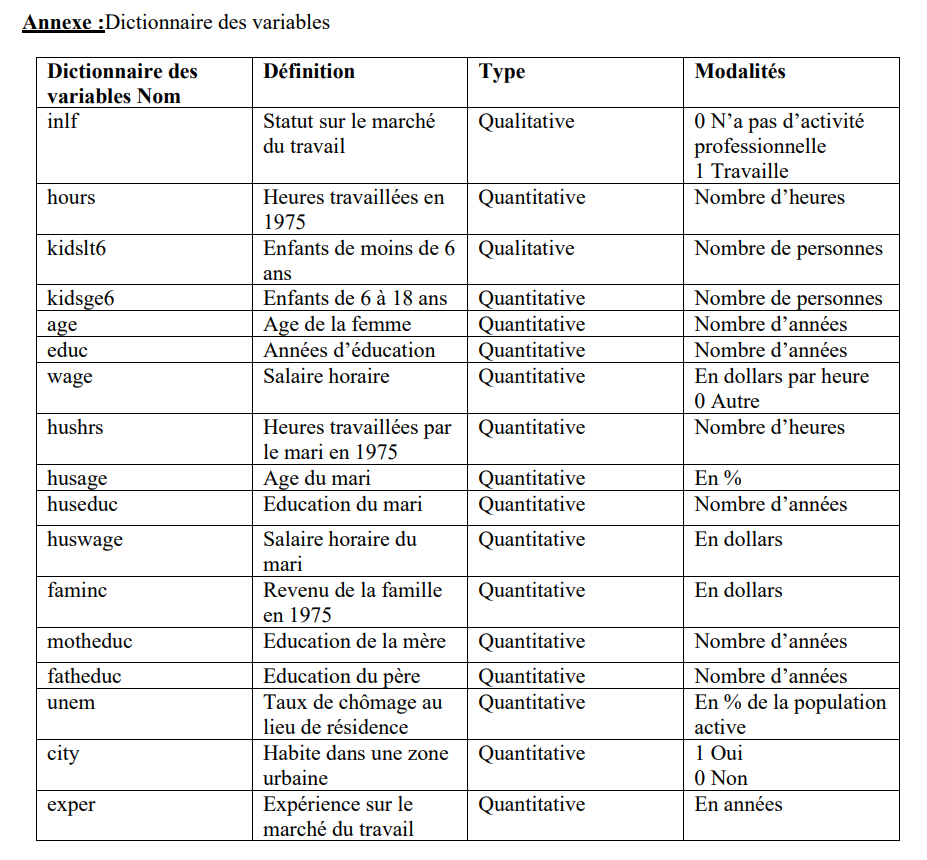